In [135]:
import urllib, json


url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())
colors = data['data'][0]['node']['color'] 
colors

['rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'magenta',
 'rgba(22

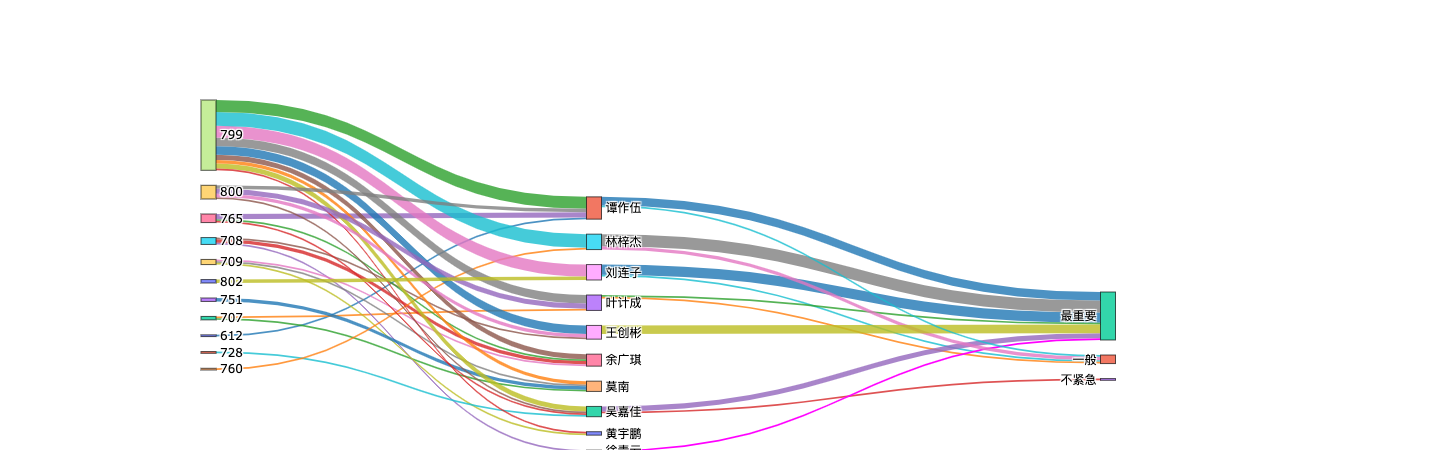

In [139]:
import pandas as pd
import numpy  as np
import urllib, json
import plotly.graph_objects as go


# 数据映射方式将名字缩写变更为名字全称
full_name = {'创彬':'王创彬','王创彬':'王创彬',
            '嘉佳':'吴嘉佳','吴嘉佳':'吴嘉佳',
            '计成':'叶计成','叶计成':'叶计成',
            '连子':'刘连子','刘连子':'刘连子',
            '作伍':'谭作伍','谭作伍':'谭作伍',
            '梓杰':'林梓杰','林梓杰':'林梓杰',
            '青云':'徐青云','徐青云':'林梓杰',
            '宇鹏':'黄宇鹏','黄宇鹏':'林梓杰',
            '广琪':'余广琪','余广琪':'林梓杰',
            '晓泉':'龙晓泉','龙晓泉':'林梓杰'
            }

# url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
# response = urllib.request.urlopen(url)
# data = json.loads(response.read())

# colors = ['rgba(31, 119, 180, 0.8)',
#  'rgba(255, 127, 14, 0.8)',
#  'rgba(44, 160, 44, 0.8)',
#  'rgba(214, 39, 40, 0.8)',
#  'rgba(148, 103, 189, 0.8)',
#  'rgba(140, 86, 75, 0.8)',
#  'rgba(227, 119, 194, 0.8)',
#  'rgba(127, 127, 127, 0.8)',
#  'rgba(188, 189, 34, 0.8)',
#  'rgba(23, 190, 207, 0.8)',
#  'rgba(31, 119, 180, 0.8)',
#  'rgba(255, 127, 14, 0.8)',
#  'rgba(44, 160, 44, 0.8)',
#  'rgba(214, 39, 40, 0.8)',
#  'rgba(148, 103, 189, 0.8)',
#  'rgba(140, 86, 75, 0.8)',
#  'rgba(227, 119, 194, 0.8)',
#  'rgba(127, 127, 127, 0.8)',
#  'rgba(188, 189, 34, 0.8)',
#  'rgba(23, 190, 207, 0.8)',
#  'rgba(31, 119, 180, 0.8)',
#  'rgba(255, 127, 14, 0.8)',
#  'rgba(44, 160, 44, 0.8)',
#  'rgba(214, 39, 40, 0.8)',
#  'rgba(148, 103, 189, 0.8)',
#  'rgba(140, 86, 75, 0.8)',
#  'rgba(227, 119, 194, 0.8)',
#  'rgba(127, 127, 127, 0.8)',
#  'rgba(188, 189, 34, 0.8)'] 


pd.set_option('display.max_rows', None)

# 
# 流水线任务分配信息
# 
works=pd.read_html("../missions", encoding='utf8')
works[1].drop('Unnamed: 0', axis=1).set_index(['需求ID'])
dd=works[1].drop('Unnamed: 0',axis=1)
# 按需求ID聚合
missions=dd.sort_values(by='需求ID')[['需求ID','需求名称','开发人员']]
missions['NUM'] = 1

label = missions[['需求ID','开发人员','NUM','需求名称']]
grouped = label['NUM'].groupby([label['需求ID'],label['开发人员']])
statics = dict(grouped.size())

data = [(key1,key2, statics[(key1,key2)]) for (key1,key2) in statics.keys() ]

# lable = []
# for (key1, key2) in statics.keys():
#     if key1 not in lable:
#         lable.append(key1)
#     if key2 not in lable:
#         lable.append(key2)

#         
# BUG 列表信息
# 

bug_list = pd.read_csv('../simappbugs/3rdVersion.csv')
bug_list[bug_list['编号'].isnull()]
tmp_bug = bug_list[~bug_list['维修人员'].isnull()][['维修人员','优先级']]
# tmp['研发人员'] = tmp['维修人员']=='创彬'

tmp_bug['维修人员'] = tmp_bug['维修人员'].map(full_name)
tmp_bug.replace(np.nan, '一般', inplace=True)
tmp_bug.replace(' ','一般',inplace=True)
tmp_bug = tmp_bug.drop(38)



stat_bug = dict(tmp_bug['优先级'].groupby([tmp_bug['维修人员'],tmp_bug['优先级']]).size())
data_bug = [(i,j,stat_bug[(i,j)]) for (i,j) in stat_bug.keys()]        

lable = []
x = []
y = list(np.arange(24)/100)

position = (0.1,0.4,0.8)

for (key1, key2) in statics.keys():
    if key1 not in lable:
        lable.append(key1)
        x.append(position[0])
    if key2 not in lable:
        lable.append(key2)
        x.append(position[1])

for (_,key2) in stat_bug:
    if key2 not in lable:
        lable.append(key2)
        x.append(position[2])

lable = tuple(lable)
# pilot    
# 映射对应关系列表
# 

sources = []
targets = []
values  = []

for (i,j,k) in data:
    sources.append(lable.index(i))
    targets.append(lable.index(j))
    values.append(k)

for (i,j,k) in data_bug:
    sources.append(lable.index(i))
    targets.append(lable.index(j))
    values.append(k)


# t = len(sources)

color = colors[0:41]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    arrangement = "snap",
    valuesuffix = " 【开发任务数】",
    node = dict(
      pad = 15,
      thickness = 15,
     
      line = dict(color = 'black', width = 0.5),
      label =  lable,
         x=x,
        y=x
#       color =  colors
    ),
    link = dict(
      source =  sources,
      target =  targets,
      value =  values,
      color = color                                                                                                                                                                                                                                                                                                                                                                                                                                      
#       label =  data['data'][0]['link']['label']
  ))])

# fig.update_layout(
#     hovermode = 'x',
#     title="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
#     font=dict(size = 10, color = 'white'),
#     plot_bgcolor='black',
#     paper_bgcolor='black'
# )

fig.show()
fig.write_html('/Users/dengjiaying/Project/Py/local.html')

In [118]:
url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())
colors = data['data'][0]['node']['color']
colors

['rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'magenta',
 'rgba(22

In [127]:
colors = data['data'][0]['node']['color'] * 2
len=41
colors[0:len]

['rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'magenta',
 'rgba(22

In [112]:
colors * 2

['rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(214, 39, 40, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 

In [109]:
len(sources)

41

In [65]:
# news_ids=list(set(source))
# news_ids=news_ids.sort(key=source.index)
lable

[612,
 '谭作伍',
 707,
 '叶计成',
 '莫南',
 708,
 '余广琪',
 '徐青云',
 '王创彬',
 709,
 '黄宇鹏',
 728,
 '吴嘉佳',
 751,
 760,
 '林梓杰',
 765,
 799,
 '刘连子',
 800,
 802,
 '一般',
 '最重要',
 '不紧急']

In [23]:
len(source_id)

29

In [20]:
target

[18,
 11,
 14,
 15,
 20,
 16,
 15,
 14,
 19,
 17,
 14,
 13,
 15,
 17,
 18,
 15,
 12,
 11,
 17,
 13,
 16,
 14,
 18,
 19,
 11,
 17,
 16,
 18,
 12]